In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Read Data:reading the phishing website dataset using pandas.

In [2]:
df = pd.read_csv("/content/drive/MyDrive/task_ml/dataset.zip (Unzipped Files)/phishing_website_dataset.csv")

In [3]:
print(df.tail())

           FILENAME                                                URL  \
188632   179093.txt                    https://www.life-in-ecuador.com   
188633    77185.txt                      https://www.winchester.gov.uk   
188634   622132.txt                    https://www.nononsensedesign.be   
188635  7503962.txt  https://patient-cell-40f5.updatedlogmylogin.wo...   
188636   384822.txt                 https://www.alternativefinland.com   

        URLLength                                           Domain  \
188632         30                          www.life-in-ecuador.com   
188633         28                            www.winchester.gov.uk   
188634         30                          www.nononsensedesign.be   
188635         55  patient-cell-40f5.updatedlogmylogin.workers.dev   
188636         33                       www.alternativefinland.com   

        DomainLength  IsDomainIP  TLD  URLSimilarityIndex  \
188632            23           0  com          100.000000   
188633      

Checking the attributes like shape, data types and columns

In [4]:
df.shape

(188637, 56)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188637 entries, 0 to 188636
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    188637 non-null  object 
 1   URL                         188637 non-null  object 
 2   URLLength                   188637 non-null  int64  
 3   Domain                      188637 non-null  object 
 4   DomainLength                188637 non-null  int64  
 5   IsDomainIP                  188637 non-null  int64  
 6   TLD                         188637 non-null  object 
 7   URLSimilarityIndex          188637 non-null  float64
 8   CharContinuationRate        188637 non-null  float64
 9   TLDLegitimateProb           188637 non-null  float64
 10  URLCharProb                 188637 non-null  float64
 11  TLDLength                   188637 non-null  int64  
 12  NoOfSubDomain               188637 non-null  int64  
 13  HasObfuscation

In [6]:
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

Dropping Irrelavent columns

In [7]:
df.drop(['URL', 'Domain','Title', 'FILENAME'], axis=1, inplace=True)

Checking for missing values

In [8]:
df.isnull().sum()

URLLength                     0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
DomainTitleMatchScore         0
URLTitleMatchScore            0
HasFavicon                    0
Robots                        0
IsResponsive                  0
NoOfURLR

Plotting missing values

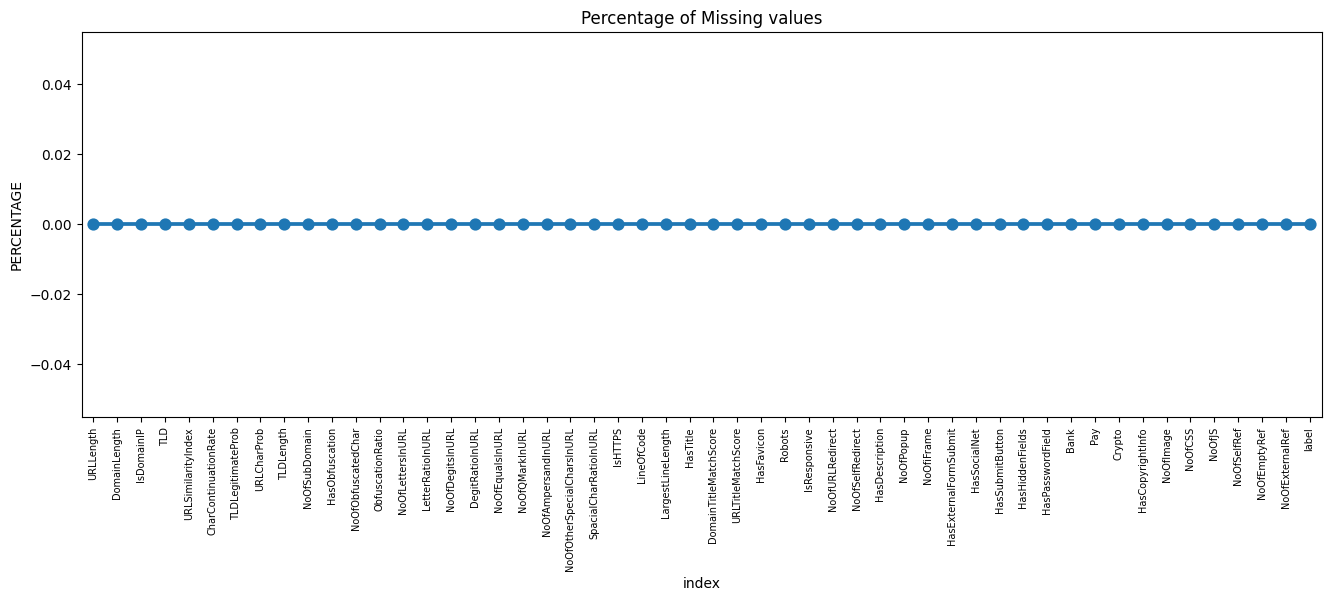

In [9]:
missing = pd.DataFrame(df.isnull().sum()/df.shape[0]*100).reset_index()
missing.columns = ['index', 'PERCENTAGE']
plt.figure(figsize=(16,5))
ax = sns.pointplot(x = 'index', y = 'PERCENTAGE',data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.show()

Checked for missing values.
Found no missing values.

Describing the data

In [10]:
Categorical_features = df.columns[(df.nunique() == 2)]

In [11]:
df.drop(Categorical_features, axis = 1).describe()

,URLLength,DomainLength,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,ObfuscationRatio,...,DomainTitleMatchScore,URLTitleMatchScore,NoOfPopup,NoOfiFrame,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
count,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,...,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000
mean,34.164326,21.369445,79.353178,0.849141,0.261557,0.055930,2.762258,1.163950,0.022774,0.000136,...,51.188957,53.112868,0.230671,1.639636,26.713142,6.347154,10.815068,67.319858,2.437099,50.759978
std,39.916861,9.033410,28.663823,0.214566,0.251490,0.010513,0.597423,0.593343,1.683502,0.003825,...,49.659255,49.546801,3.951018,4.889893,75.828138,12.128622,17.548149,187.760312,18.296732,168.241387
min,13.000000,4.000000,0.155574,0.000000,0.000000,0.001174,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,58.729877,0.687500,0.006970,0.051070,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,27.000000,20.000000,100.000000,1.000000,0.079963,0.058116,3.000000,1.000000,0.000000,0.000000,...,88.888889,100.000000,0.000000,0.000000,10.000000,2.000000,6.000000,17.000000,0.000000,11.000000
75%,34.000000,24.000000,100.000000,1.000000,0.522907,0.062976,3.000000,1.000000,0.000000,0.000000,...,100.000000,100.000000,0.000000,1.000000,30.000000,8.000000,16.000000,91.000000,1.000000,60.000000
max,6097.000000,110.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,447.000000,0.348000,...,100.000000,100.000000,602.000000,398.000000,7641.000000,1041.000000,2828.000000,27397.000000,4887.000000,27516.000000


Mode of Categorical features

In [12]:
df[Categorical_features].mean().round().astype(int)

IsDomainIP               0
HasObfuscation           0
IsHTTPS                  1
HasTitle                 1
HasFavicon               0
Robots                   0
IsResponsive             1
NoOfURLRedirect          0
NoOfSelfRedirect         0
HasDescription           0
HasExternalFormSubmit    0
HasSocialNet             0
HasSubmitButton          0
HasHiddenFields          0
HasPasswordField         0
Bank                     0
Pay                      0
Crypto                   0
HasCopyrightInfo         1
label                    1
dtype: int64

Mode of categorical features in phishing websites

In [13]:
df_phishing = df[df['label'] == 0]
df_phishing[Categorical_features].mean().round().astype(int)

IsDomainIP               0
HasObfuscation           0
IsHTTPS                  0
HasTitle                 1
HasFavicon               0
Robots                   0
IsResponsive             0
NoOfURLRedirect          0
NoOfSelfRedirect         0
HasDescription           0
HasExternalFormSubmit    0
HasSocialNet             0
HasSubmitButton          0
HasHiddenFields          0
HasPasswordField         0
Bank                     0
Pay                      0
Crypto                   0
HasCopyrightInfo         0
label                    0
dtype: int64

Checking the distribution of websites

In [14]:
df.value_counts('label')/df.shape[0]*100

label
1    58.986837
0    41.013163
Name: count, dtype: float64

Text(0.5, 1.0, 'Count of legitimate and phishing website')

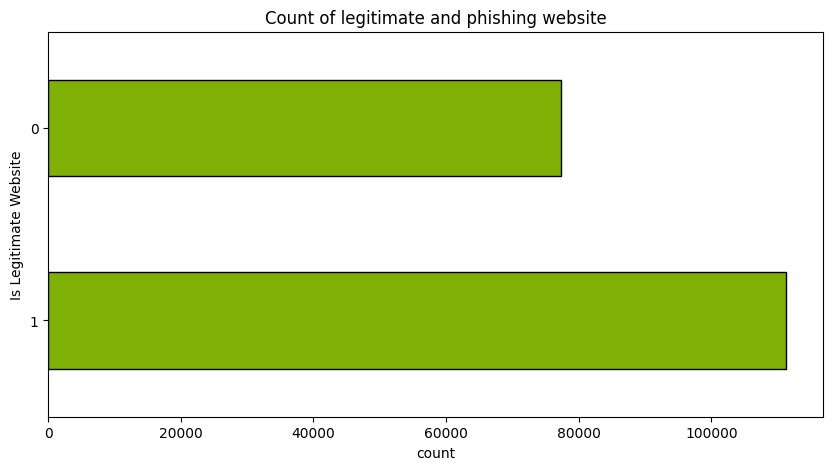

In [31]:
df.value_counts('label').plot(kind = 'barh', figsize = (10, 5), color = '#7FB005', edgecolor = 'black')
plt.xlabel("count")
plt.ylabel("Is Legitimate Website")
plt.title('Count of legitimate and phishing website')

From the above code we can see that there are 58 percentage of legitimate websites and 41 precentage of phishing websites.Hence the data is balanced

Most Correlated features to label

<Axes: >

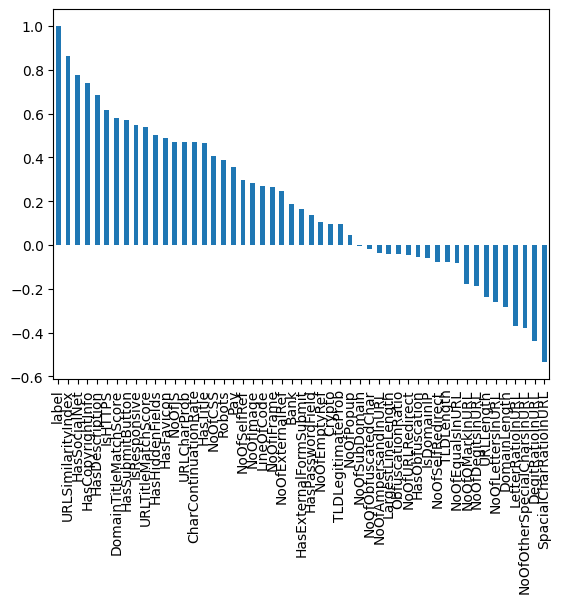

In [16]:
df.drop('TLD', axis = 1).corr()['label'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

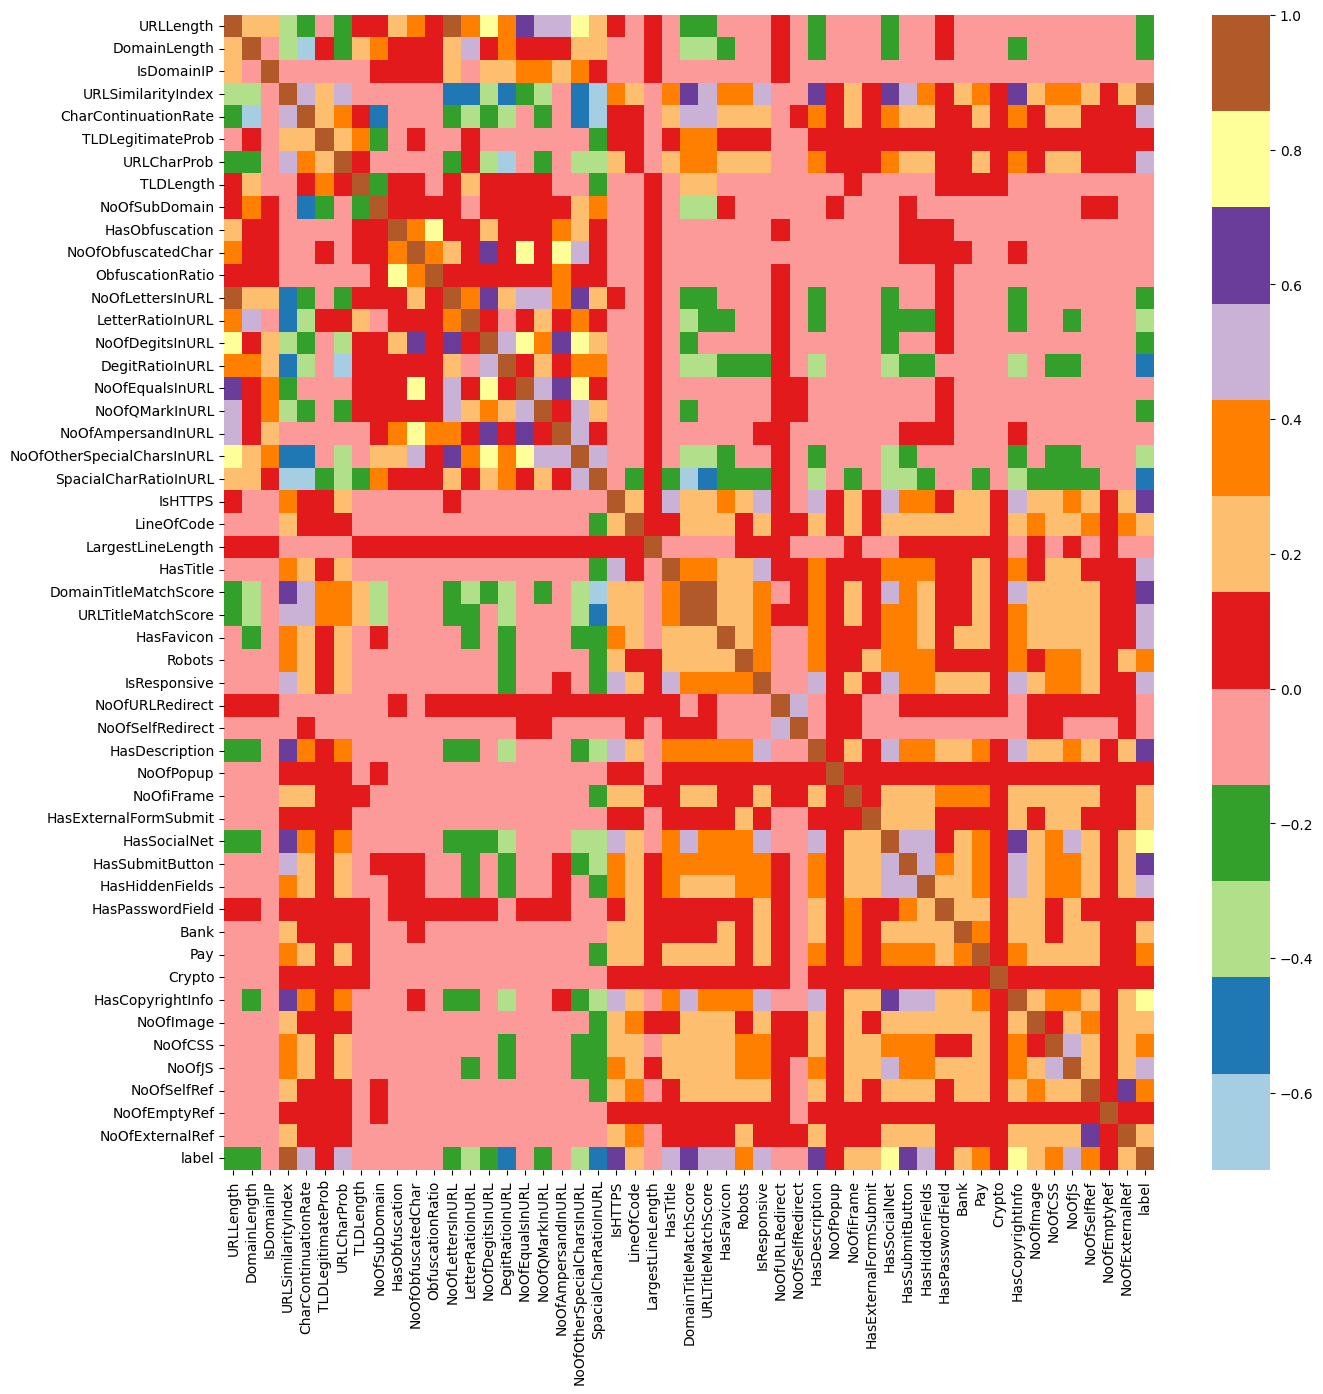

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(df.drop('TLD', axis=1).corr(), cmap='Paired')

Looking at Top TLD for all websites and phishing websites

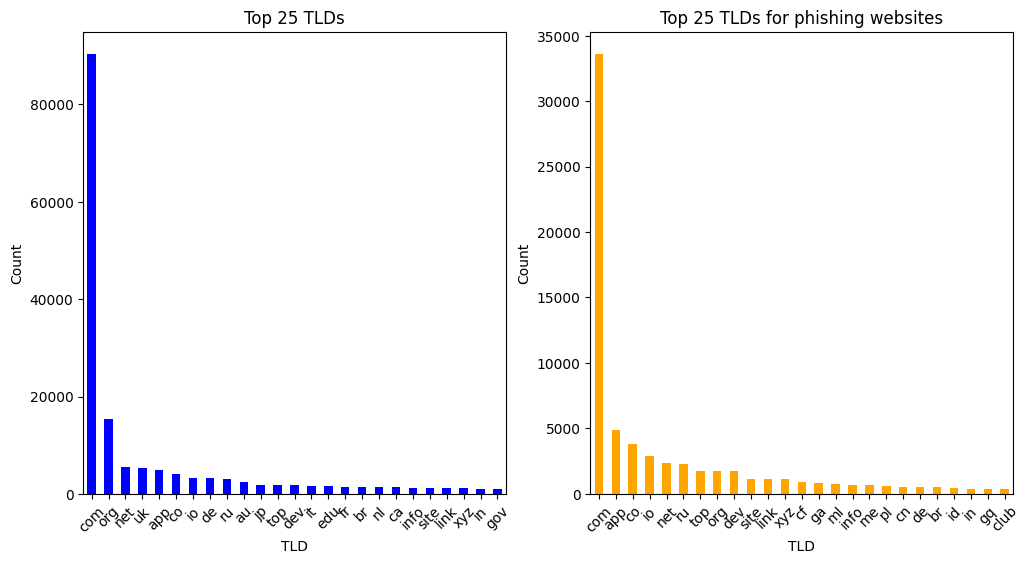

In [18]:
top_categories_all = df['TLD'].value_counts().head(25)
top_categories_label_0 = df[df['label'] == 0]['TLD'].value_counts().head(25)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

top_categories_all.plot(kind='bar', color='blue', ax=axs[0])
axs[0].set_title('Top 25 TLDs')
axs[0].set_xlabel('TLD')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis = 'x', rotation=45)

top_categories_label_0.plot(kind='bar', color='orange', ax=axs[1])
axs[1].set_title('Top 25 TLDs for phishing websites')
axs[1].set_xlabel('TLD')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis = 'x', rotation=45)


Visualising relation between URL similarity index and Legitimicy of website

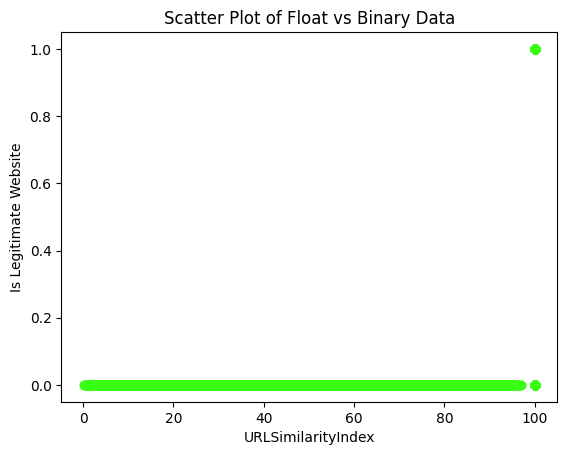

In [19]:
plt.scatter(df['URLSimilarityIndex'], df['label'], color = '#39FF14')
plt.xlabel('URLSimilarityIndex')
plt.ylabel('Is Legitimate Website')
plt.title('Scatter Plot of Float vs Binary Data')
plt.show()

visualising the legitimacy of website based on Social Net  

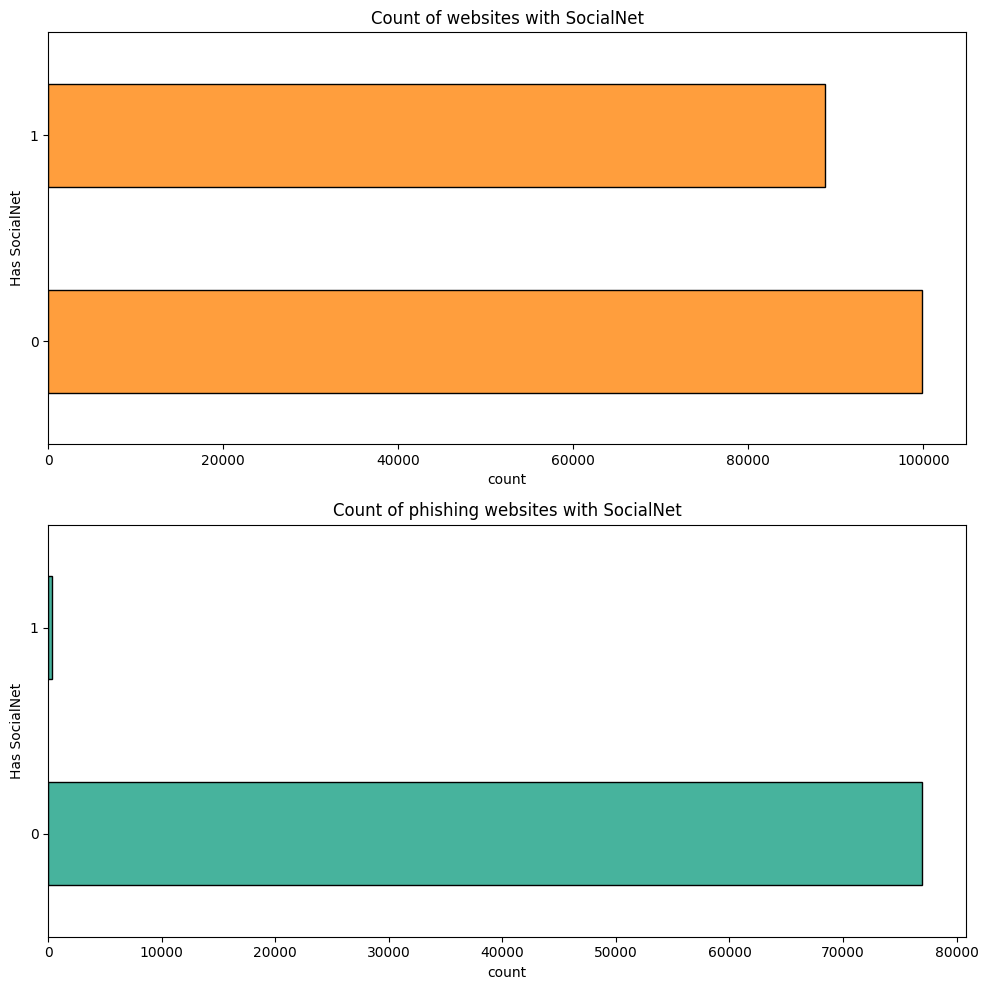

In [20]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 10))
df.value_counts('HasSocialNet').plot(kind='barh', ax=axes[0], color = '#FF9E3D', edgecolor = 'black')
axes[0].set_xlabel("count")
axes[0].set_ylabel("Has SocialNet")
axes[0].set_title('Count of websites with SocialNet')

df.loc[df['label'] == 0, :].value_counts('HasObfuscation').plot(kind='barh', ax=axes[1], color = '#47B39D', edgecolor = 'black')
axes[1].set_xlabel("count")
axes[1].set_ylabel("Has SocialNet")
axes[1].set_title('Count of phishing websites with SocialNet')

plt.tight_layout()
plt.show()

visualising the relation between Number of References and legitimacy of websites

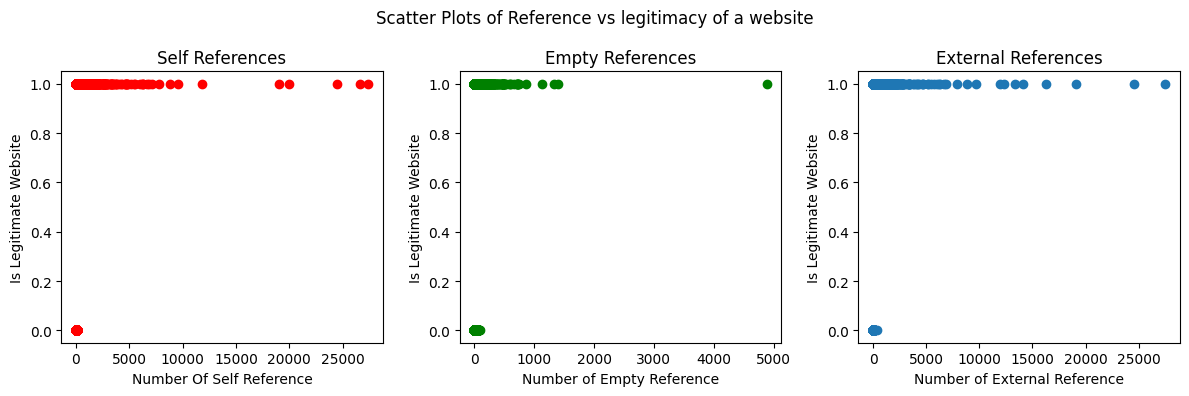

In [21]:
title = 'Scatter Plots of Reference vs legitimacy of a website'

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].scatter(df['NoOfSelfRef'], df['label'], color = 'red')
axs[0].set_title('Self References')
axs[0].set_xlabel("Number Of Self Reference")
axs[0].set_ylabel("Is Legitimate Website")

axs[1].scatter(df['NoOfEmptyRef'], df['label'], color = 'green')
axs[1].set_title('Empty References')
axs[1].set_xlabel("Number of Empty Reference")
axs[1].set_ylabel("Is Legitimate Website")

axs[2].scatter(df['NoOfExternalRef'], df['label'])
axs[2].set_title('External References')
axs[2].set_xlabel("Number of External Reference")
axs[2].set_ylabel("Is Legitimate Website")

fig.suptitle(title)

plt.tight_layout()

plt.show()

One Hot encodeing column TLD using get dummies

In [22]:
df_encoded = pd.get_dummies(df, columns=['TLD'], drop_first=True)


In [23]:
df_encoded.head()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,TLD_xn--p1acf,TLD_xn--p1ai,TLD_xyz,TLD_yachts,TLD_ye,TLD_youtube,TLD_za,TLD_zm,TLD_zone,TLD_zw
0,31,24,0,100.0,1.000000,0.522907,0.061933,3,1,0,...,False,False,False,False,False,False,False,False,False,False
1,23,16,0,100.0,0.666667,0.032650,0.050207,2,1,0,...,False,False,False,False,False,False,False,False,False,False
2,29,22,0,100.0,0.866667,0.028555,0.064129,2,2,0,...,False,False,False,False,False,False,False,False,False,False
3,26,19,0,100.0,1.000000,0.522907,0.057606,3,1,0,...,False,False,False,False,False,False,False,False,False,False
4,33,26,0,100.0,1.000000,0.079963,0.059441,3,1,0,...,False,False,False,False,False,False,False,False,False,False


Seperating the data

In [24]:
X = df_encoded.drop('label', axis=1)
y = df_encoded['label']


Spliting the data into training and testing data

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)


Training the model

In [26]:
import xgboost as xgb
classifier = xgb.XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Getting the Accuracy score

In [32]:
classifier.score(X_test, y_test) * 100

99.99363867684478

In [28]:
y_pred = classifier.predict(X_test)

Making the confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(cm)
print(report)

[[19277     3]
 [    0 27880]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19280
           1       1.00      1.00      1.00     27880

    accuracy                           1.00     47160
   macro avg       1.00      1.00      1.00     47160
weighted avg       1.00      1.00      1.00     47160



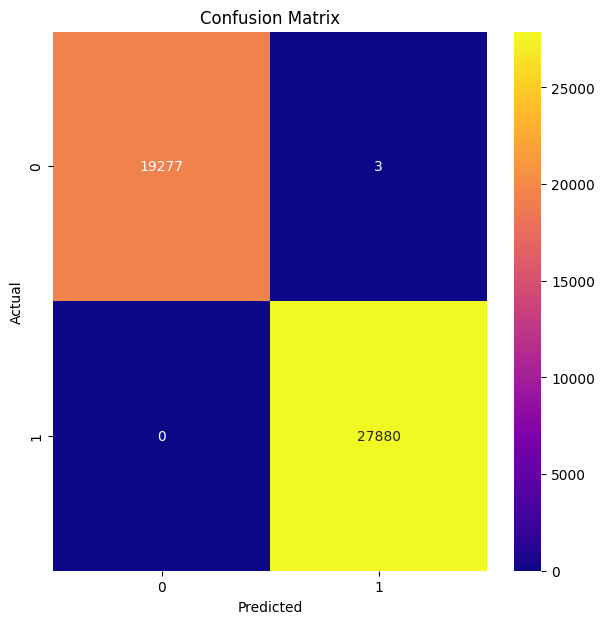

In [30]:
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()